## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
#Kasus yang diambil adalah deteksi pesan spam (Spam Detection), yaitu mengklasifikasikan apakah suatu pesan teks (SMS) termasuk ke dalam kategori spam atau ham (bukan spam).
#Tujuan akhirnya adalah membangun model NLP yang mampu mengenali dan memfilter pesan spam secara otomatis.

# 2. Penjelasan setiap kolomnya
#Dataset memiliki 2 kolom utama:
#| Nama Kolom | Tipe Data       | Deskripsi                                                                                                                                  |
#| ---------- | --------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
#| `Category` | object (string) | Label atau kategori dari pesan. Nilainya adalah: <br> - **ham** → pesan normal (bukan spam) <br> - **spam** → pesan yang terindikasi spam. |
#| `Message`  | object (string) | Isi pesan teks dalam bahasa Inggris. Setiap baris merepresentasikan satu pesan SMS yang diterima pengguna.                                 |
#Total data yang tersedia adalah 5572 baris (pesan).

# 3. Import library
import pandas as pd
# 4. Load data
data = pd.read_csv(r"C:/Users/LENOVO/Downloads/NLP_Tugas\spam.csv", encoding="latin-1")
# Tampilkan 5 baris pertama
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


## Data Understanding

In [8]:
# 1. Jumlah baris data
print(f"Jumlah baris data: {len(data)}")
print(f"Jumlah kolom data: {data.shape[1]}")

Jumlah baris data: 5572
Jumlah kolom data: 2


In [9]:
# 2. Panjang rata-rata setiap baris
rata_panjang_pesan = data['Message'].apply(len).mean()
print(f"Panjang rata-rata setiap pesan: {rata_panjang_pesan:.2f} karakter")

Panjang rata-rata setiap pesan: 80.49 karakter


In [10]:
# 3. Cek data duplikasi
duplikat = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplikat}")

# Jika ingin melihat data duplikatnya:
data[data.duplicated()]

Jumlah data duplikat: 415


,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
# 4. Cek data kosong
print("Jumlah data kosong per kolom:")
print(data.isnull().sum())

Jumlah data kosong per kolom:
Category    0
Message     0
dtype: int64


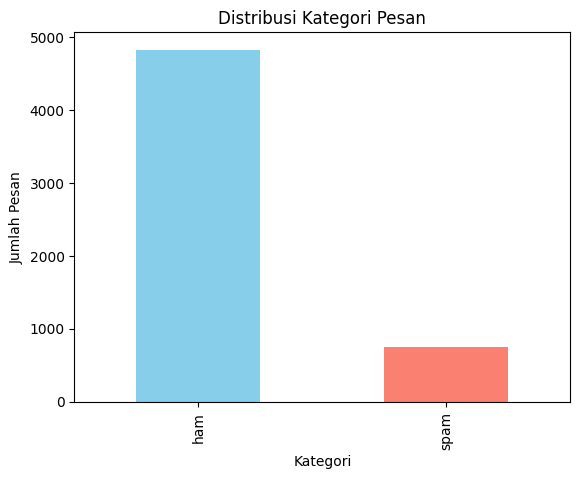

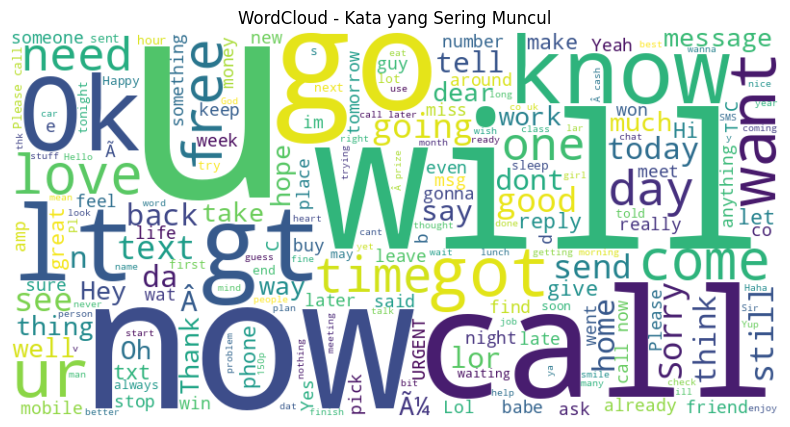

In [ ]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Distribusi kategori ---
data['Category'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kategori Pesan')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pesan')
plt.show()

# Gabungkan semua pesan menjadi satu teks panjang
all_text = ' '.join(data['Message'])

# Buat dan tampilkan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Kata yang Sering Muncul')
plt.show()

## Data Text Processing

In [15]:
# 1. Tokenisasi
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

data['tokens'] = data['Message'].apply(lambda x: word_tokenize(x.lower()))
print(data[['Message', 'tokens']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                              tokens  
0  [go, until, jurong, point, ,, crazy, .., avail...  
1           [ok, lar, ..., joking, wif, u, oni, ...]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor, ..., u, c, alrea...  
4  [nah, i, do, n't, think, he, goes, to, usf, ,,...  


In [16]:
# 2. Lemmatization
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

data['lemmatized'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(data[['Message', 'lemmatized']].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          lemmatized  
0  [go, until, jurong, point, ,, crazy, .., avail...  
1           [ok, lar, ..., joking, wif, u, oni, ...]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor, ..., u, c, alrea...  
4  [nah, i, do, n't, think, he, go, to, usf, ,, h...  


In [19]:
# 3. Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
data['stemmed'] = data['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
print(data[['Message', 'stemmed']].head())

                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                             stemmed  
0  [go, until, jurong, point, ,, crazi, .., avail...  
1             [ok, lar, ..., joke, wif, u, oni, ...]  
2  [free, entri, in, 2, a, wkli, comp, to, win, f...  
3  [u, dun, say, so, earli, hor, ..., u, c, alrea...  
4  [nah, i, do, n't, think, he, goe, to, usf, ,, ...  


In [21]:
# 4. Stopword removal (Tanda baca, angka dan kata)
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words]

data['cleaned'] = data['tokens'].apply(clean_text)
print(data[['Message', 'cleaned']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                             cleaned  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, wkly, comp, win, fa, cup, final,...  
3      [u, dun, say, early, hor, u, c, already, say]  
4     [nah, think, goes, usf, lives, around, though]  


In [23]:
# 5. Text Normalisasi
data['normalized'] = data['cleaned'].apply(lambda x: ' '.join(x))
print(data[['Message', 'normalized']].head())

                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          normalized  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts may...  
3                u dun say early hor u c already say  
4             nah think goes usf lives around though  


In [ ]:
# 6. Matrix correlation (opsional)

In [24]:
# 7. Labeling data (Lexicon, Bert, atau polarity)
data['label'] = data['Category'].map({'ham': 0, 'spam': 1})
print(data[['Category', 'label']].head())

  Category  label
0      ham      0
1      ham      0
2     spam      1
3      ham      0
4      ham      0


In [25]:
# 8. Text Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['normalized'])
y = data['label']

print("Shape dari TF-IDF matrix:", X.shape)

Shape dari TF-IDF matrix: (5572, 3000)


In [26]:
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])
# catatan (lakukan tahap 1- 5 apabila diperlukan, jika tidak langsung ke bagian 6-9)

Jumlah data training: 4457
Jumlah data testing : 1115


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih (baik machine learning maupun deep learning)
#Saya akan menggunakan model deep learning tipe Neural Network (Multilayer Perceptron / MLP).
#Model ini cocok untuk kasus text classification setelah data diubah menjadi bentuk numerik (TF-IDF).

# Disarankan menggunakan deep learning.
#Alasan memilih Deep Learning (MLP):
#Mampu mempelajari pola kompleks antar kata dalam pesan.
#Bisa menangkap hubungan non-linear antar fitur teks.
#Hasil akurasi biasanya lebih baik daripada model klasik (Naive Bayes, Logistic Regression, dll).

#Model yang saya gunakan memiliki lapisan-lapisan berikut:
#Input Layer — menerima vektor hasil TF-IDF.
#Hidden Layer 1 — 128 neuron dengan aktivasi ReLU.
#Dropout Layer — mengurangi overfitting 
#Hidden Layer 2 — 64 neuron dengan aktivasi ReLU.
#Output Layer — 1 neuron dengan aktivasi sigmoid untuk klasifikasi biner (spam / ham).

In [37]:
# 1. Import library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
# Ubah TF-IDF sparse matrix ke bentuk dense (numpy array)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [39]:
# 2. Membangun arsitektur model (neural nerwork)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384128    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 392449 (1.50 MB)
Trainable params: 392449 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# 3. Kompilasi model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [42]:
# 4. Latih model
history = model.fit(
    X_train.toarray(), y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test.toarray(), y_test),
    verbose=1
)

Epoch 1/10
140/140 [==============================] - 12s 56ms/step - loss: 0.3232 - accuracy: 0.8656 - val_loss: 0.1530 - val_accuracy: 0.9498
Epoch 2/10
140/140 [==============================] - 6s 40ms/step - loss: 0.0800 - accuracy: 0.9773 - val_loss: 0.0767 - val_accuracy: 0.9740
Epoch 3/10
140/140 [==============================] - 9s 62ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0847 - val_accuracy: 0.9803
Epoch 4/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0993 - val_accuracy: 0.9794
Epoch 5/10
140/140 [==============================] - 6s 40ms/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 0.1026 - val_accuracy: 0.9785
Epoch 6/10
140/140 [==============================] - 6s 44ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.1110 - val_accuracy: 0.9767
Epoch 7/10
140/140 [==============================] - 5s 37ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.1185 - val_accuracy: 0.979

In [43]:
# 5. Evaluasi model
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f"\nAkurasi Model: {accuracy*100:.2f}%")

35/35 [==============================] - 1s 36ms/step - loss: 0.1236 - accuracy: 0.9749

Akurasi Model: 97.49%


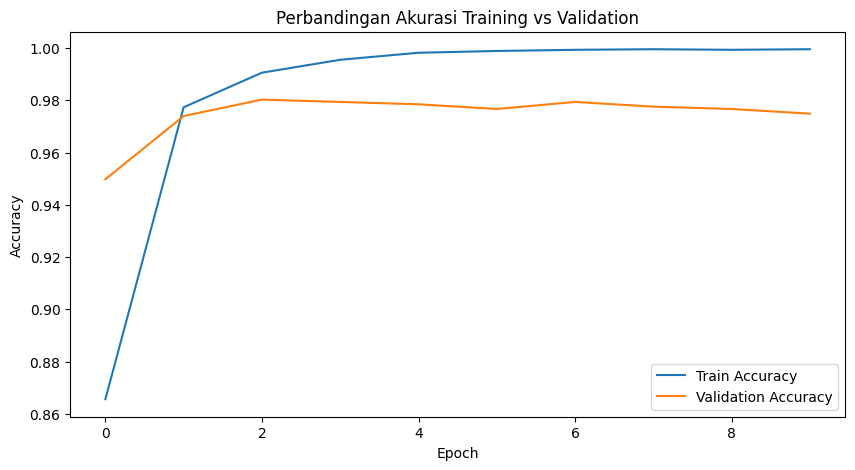

In [44]:
# 6. Visualisasi proses training
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Perbandingan Akurasi Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

In [46]:
# 1. Import library evaluasi
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
# Konversi data sparse menjadi dense (array biasa)
if not isinstance(X_test, np.ndarray):
    X_test_dense = X_test.toarray()
else:
    X_test_dense = X_test

In [ ]:
# 2. Prediksi pada data uji
y_pred = model.predict(X_test_dense)
y_pred = (y_pred > 0.5).astype(int) 

35/35 [==============================] - 1s 21ms/step


In [56]:
# 3. Evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[956  10]
 [ 18 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.93      0.88      0.90       149

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



## Perbandingan Model apabila menggunakan beberapa algoritma

In [ ]:
# Gunakan line chart atau barchart untuk perbandingannya

In [57]:
# === PERBANDINGAN MODEL ===
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Model 1 Deep Learning (sudah dilatih sebelumnya)
dl_pred = model.predict(X_test_dense)
dl_pred = (dl_pred > 0.5).astype(int)
dl_acc = accuracy_score(y_test, dl_pred)

35/35 [==============================] - 1s 29ms/step


In [59]:
# Model 2 Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_dense, y_train)
lr_pred = lr.predict(X_test_dense)
lr_acc = accuracy_score(y_test, lr_pred)

In [60]:
# Model 3 Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_dense, y_train)
nb_pred = nb.predict(X_test_dense)
nb_acc = accuracy_score(y_test, nb_pred)

In [61]:
# Model 4 Support Vector Machine (SVM)
svm = LinearSVC()
svm.fit(X_train_dense, y_train)
svm_pred = svm.predict(X_test_dense)
svm_acc = accuracy_score(y_test, svm_pred)

In [62]:
# === Simpan hasil akurasi ===
models = ['Deep Learning', 'Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [dl_acc, lr_acc, nb_acc, svm_acc]

In [63]:
# === Tampilkan hasil numerik ===
for m, a in zip(models, accuracies):
    print(f"{m}: {a:.4f}")

Deep Learning: 0.9749
Logistic Regression: 0.9632
Naive Bayes: 0.9713
SVM: 0.9794


(0.0, 1.0)

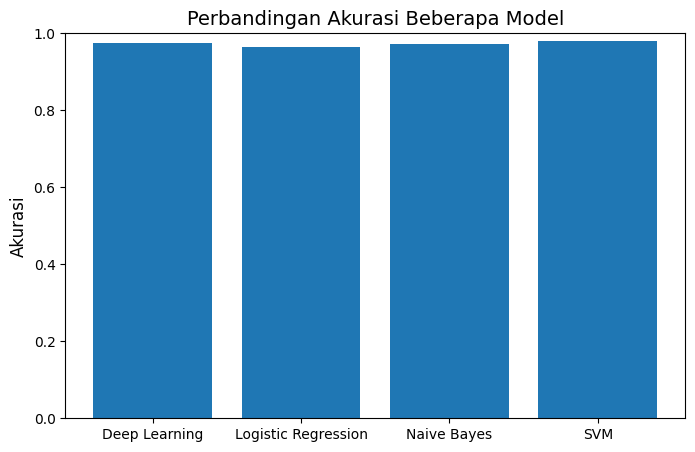

In [68]:
# === Visualisasi hasil perbandingan ===
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies)
plt.title('Perbandingan Akurasi Beberapa Model', fontsize=14)
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0, 1)
